In [1]:
# Name Dipika Sharma
# DSC 530-T301 Data exploration and Analysis
# Week 4

# Assignment 4.2 - (3.1, 3.2, 4.1, 4.2)

http://thinkstats2.com

Copyright 2016 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT

In [44]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np

# load the NSFG pregnancy file

import nsfg
import first
import thinkstats2
import thinkplot

In [45]:
from os.path import basename, exists


def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)


download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/nsfg.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/first.py")


download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dct")
download(
    "https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dat.gz"
)

Exercise 3.1

Exercise 3.1 Something like the class size paradox appears if you survey
children and ask how many children are in their family. Families with many
children are more likely to appear in your sample, and families with no children have no chance to be in the sample.
Use the NSFG respondent variable NUMKDHH to construct the actual distribution for the number of children under 18 in the household.
Now compute the biased distribution we would see if we surveyed the children
and asked them how many children under 18 (including themselves) are in
their household.
Plot the actual and biased distributions, and compute their means. As a
starting place, you can use chap03ex.ipynb.

In [46]:
resp = nsfg.ReadFemResp()

In [47]:
# PMF of respondent variable NUMKDHH

pmf = thinkstats2.Pmf(resp.numkdhh, label='numkdhh')

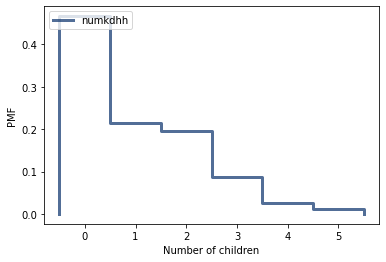

In [48]:
# plot of Pmf make step function stating that only few families have more then 2 children under 18 and frequencies decreases with increase in children.

thinkplot.Pmf(pmf)
thinkplot.Config(xlabel='Number of children', ylabel='PMF')

In [9]:
# Below function will calculate the biased Pmf if we take the surveys and asked children how many children under 18 are in their household

def BiasPmf(pmf, label):
    new_pmf = pmf.Copy(label=label)

    for x, p in pmf.Items():
        new_pmf.Mult(x, x)

    new_pmf.Normalize()
    return new_pmf

In [10]:
# Calculating biased Pmf

biased = BiasPmf(pmf, label='biased')

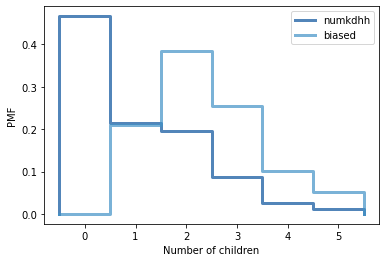

In [11]:
# Plotting Pmf and Biased Pmf.

thinkplot.PrePlot(2)
thinkplot.Pmfs([pmf, biased])
thinkplot.Config(xlabel='Number of children', ylabel='PMF')


In [12]:
pmf.Mean() # Actual Mean

1.024205155043831

In [13]:
biased.Mean()   # Biased Mean


2.403679100664282

We can see the actual mean is 1.02 and biased mean is 2.4 which is higher then the actual mean. 
Also we can see from plot that the frequency decreases with increase of children in family. So there are less number of families who have children under 18 in house.

Exercise 3.2

Exercise 3.2 In Section 2.7 we computed the mean of a sample by adding
up the elements and dividing by n. If you are given a PMF, you can still
compute the mean, but the process is slightly different:

Write functions called PmfMean and PmfVar that take a Pmf object and compute the mean and variance. 
To test these methods, check that they are
consistent with the methods Mean and Var provided by Pmf

In [14]:
# Defining the Mean function

def PmfMean(pmf):
    mean = 0.0
    for x, p in pmf.d.items():
        mean += p * x
    return mean


In [15]:
# Defining the Variance function to calculate and return variance.

def PmfVar(pmf, mu=None):
    if mu is None:
        mu = pmf.Mean()

    var = 0.0
    for x, p in pmf.d.items():
        var += p * (x - mu) ** 2
    return var

In [16]:
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dat.gz")

In [17]:
preg = nsfg.ReadFemPreg()

In [18]:
live = preg[preg.outcome == 1]

In [19]:
pmf_preg = thinkstats2.Pmf(live.prglngth, label="prglngth")

In [20]:
# Calculating the mean and variance using PmfMean and PmfVaraince functions.

mean_def = PmfMean(pmf_preg)
var_def = PmfVar(pmf_preg)
mean_def, var_def

(38.56055968517709, 7.301863788195439)

In [21]:
# Calculating man and variance using the Pmf methods.

mean_pmf = pmf_preg.Mean()
var_pmf = pmf_preg.Var()
mean_pmf, var_pmf

(38.56055968517709, 7.301863788195439)

In [22]:
if mean_def == mean_pmf:
    print("The mean value of declare function and pmf method Matched. The Mean Value is :", mean_def)
else:
    print("Mean values of declare function and pmf method not matched")

The mean value of declare function and pmf method Matched. The Mean Value is : 38.56055968517709


In [23]:
if var_def == var_pmf:
    print("The variance value of declare function and pmf method Matched. The variance Value is :", var_def)
else:
    print("Variance values of declare function and pmf method not matched")

The variance value of declare function and pmf method Matched. The variance Value is : 7.301863788195439


Exercise 4.1

Exercise 4.1 How much did you weigh at birth? If you don’t know, call your
mother or someone else who knows. Using the NSFG data (all live births),
compute the distribution of birth weights and use it to find your percentile
rank. If you were a first baby, find your percentile rank in the distribution
for first babies. Otherwise use the distribution for others. If you are in the
90th percentile or higher, call your mother back and apologize.

In [24]:
# weight at birth

weight = 7.8

In [25]:
# Load data from nsfg
live, firsts, others = first.MakeFrames()

In [26]:
# compute the distribution of birth weight for first born and others

first_wgt = firsts.totalwgt_lb
first_wgt_dropna = first_wgt.dropna()
print('Firsts', len(first_wgt), len(first_wgt_dropna))
 
other_wgt = others.totalwgt_lb
other_wgt_dropna = other_wgt.dropna()
print('Others', len(other_wgt), len(other_wgt_dropna))

first_pmf = thinkstats2.Pmf(first_wgt_dropna, label='first')
other_pmf = thinkstats2.Pmf(other_wgt_dropna, label='other')

Firsts 4413 4363
Others 4735 4675


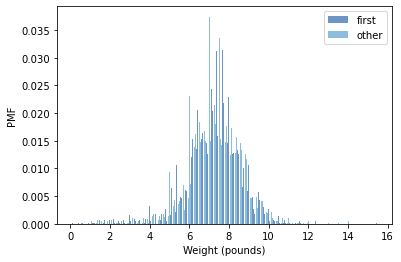

In [27]:
# Plotting the PMF's of birth weights for first orn and others 
# but as we can see it is difficult to interpret any information from below chart. 
# We are not able to find any difference.

width = 0.4 / 16

thinkplot.PrePlot(2)
thinkplot.Hist(first_pmf, align='right', width=width)
thinkplot.Hist(other_pmf, align='left', width=width)
thinkplot.Config(xlabel='Weight (pounds)', ylabel='PMF')

In [28]:
# PercentileRank is use to calculate the fraction of scores less than or equal to your_score.

def PercentileRank(scores, your_score):
    count = 0
    for score in scores:
        if score <= your_score:
            count += 1

    percentile_rank = 100.0 * count / len(scores)
    return percentile_rank

In [29]:
# Percentile implies that how much of your score is superior to other test takers.

def Percentile(scores, percentile_rank):
    scores.sort()
    for score in scores:
        if PercentileRank(scores, score) >= percentile_rank:
            return score

In [30]:
# Efficient way to calculate percentiles.

def Percentile2(scores, percentile_rank):
    scores.sort()
    index = percentile_rank * (len(scores)-1) // 100
    return scores[int(index)]

In [31]:
# The result in CDF is 0-1, it is similar to PercentileRank but in percentileRank the result is 0-100

def EvalCdf(sample, x):
    count = 0.0
    for value in sample:
        if value <= x:
            count += 1

    prob = count / len(sample)
    return prob

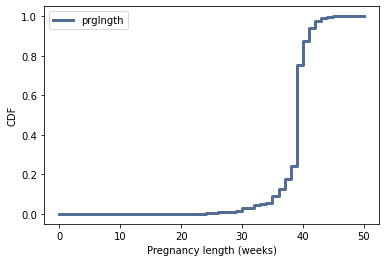

In [32]:
# The distribution of pregnancy length for live births.

cdf = thinkstats2.Cdf(live.prglngth, label='prglngth')
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Pregnancy length (weeks)', ylabel='CDF', loc='upper left')

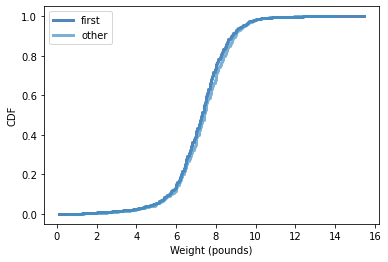

In [33]:
# In general, CDFs are a good way to visualize distributions as it helps you to find out the relationship between the cumulative probability against weight variable.
# They are not as noisy as PMFs, and if you plot several CDFs on the same axes, any differences between them are apparent.

first_cdf = thinkstats2.Cdf(firsts.totalwgt_lb, label='first')
other_cdf = thinkstats2.Cdf(others.totalwgt_lb, label='other')

thinkplot.PrePlot(2)
thinkplot.Cdfs([first_cdf, other_cdf])
thinkplot.Config(xlabel='Weight (pounds)', ylabel='CDF')

# In this example, we can see that first babies are slightly, but consistently, lighter than others.

In [34]:
# We can use the CDF of birth weight to compute percentile-based statistics.

weights = live.totalwgt_lb
live_cdf = thinkstats2.Cdf(weights, label='live')

In [35]:
# We can use the CDF to look up the percentile rank of a particular value. 
# For example, my son was 8.2 pounds at birth, which is near the 77th percentile.

# the percentileRank function with live dataframe to observe my birth weight.

live_cdf.PercentileRank(weight)

65.60079663642398

In [36]:
# Since i am the second child I am finding the persentile rank in the others babies distribution.

other_cdf.PercentileRank(weight)

63.101604278074866

Exercise 4.2

Exercise 4.2 The numbers generated by random.random are supposed to be
uniform between 0 and 1; that is, every value in the range should have the
same probability.
Generate 1000 numbers from random.random and plot their PMF and CDF.
Is the distribution uniform?

In [37]:
import numpy as np

In [38]:
randm = t = np.random.random(1000)

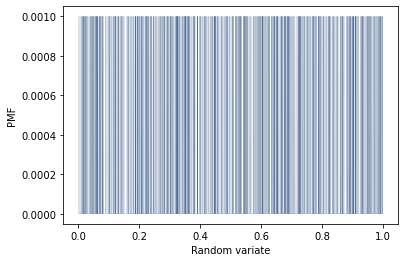

In [42]:
# Calculating Pmf for random variable.

pmf_randm = thinkstats2.Pmf(randm)
thinkplot.Pmf(pmf_randm, linewidth=0.1)
thinkplot.Config(xlabel='Random variate', ylabel='PMF')

Above plot represent the PMF of random variable. The distribution is uniform as all the random variabe have same probability.

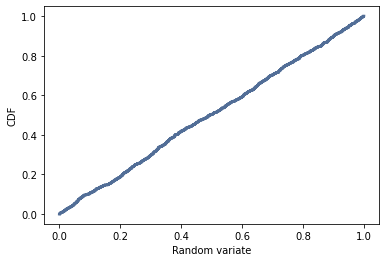

In [43]:
# CDF for random variable
cdf_randm = thinkstats2.Cdf(randm)
thinkplot.Cdf(cdf_randm)
thinkplot.Config(xlabel='Random variate', ylabel='CDF')

From above plot we see a linear realtioship between the CDF and random variable where probability increases at same rate with random variables.